In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import json
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [31]:
df_movie = pd.read_csv('data_movies_v2.csv')

# Looking for Null and Zero Values in the dataset

In [77]:
df_movie.isna().sum()

index                             0
budget                            0
genres                           28
homepage                       3091
id                                0
keywords                        412
original_language                 0
original_title                    0
overview                          3
popularity                        0
production_companies              0
production_countries              0
release_date                      1
revenue                           0
runtime                           0
spoken_languages                  0
status                            0
tagline                         844
title                             0
vote_average                      0
vote_count                        0
cast                             43
crew                              0
director                         30
Drama                             0
Comedy                            0
Thriller                          0
Action                      

In [78]:
df_movie.eq(0).sum()

index                             1
budget                         1037
genres                            0
homepage                          0
id                                0
keywords                          0
original_language                 0
original_title                    0
overview                          0
popularity                        1
production_companies              0
production_countries              0
release_date                      0
revenue                        1427
runtime                          35
spoken_languages                  0
status                            0
tagline                           0
title                             0
vote_average                     63
vote_count                       62
cast                              0
crew                              0
director                          0
Drama                          2506
Comedy                         3081
Thriller                       3544
Action                      

In [44]:
#Removal of rows with zero valued popularity
df_movie_no_0_popularity = df_movie[(df_movie[['popularity']] != 0).all(axis=1)]
columns_to_plot = df_movie_no_0_popularity.columns.values.tolist()[24:44]

#a dictionary to store average popularities for each genre
average_popularities = {}

#average popularity for each genre
for column in columns_to_plot:
    average_popularity = df_movie_no_0_popularity[df_movie_no_0_popularity[column] == 1]['popularity'].mean()
    average_popularities[column] = average_popularity
    
sorted_popularities = dict(sorted(average_popularities.items(), key=lambda item: item[1]))


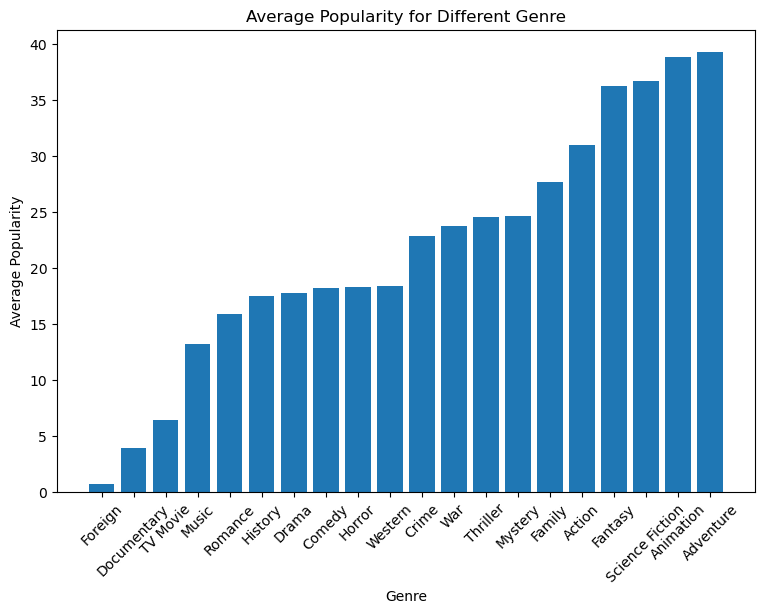

In [46]:
plt.figure(figsize=(9, 6))
plt.bar(sorted_popularities.keys(), sorted_popularities.values())
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.title('Average Popularity for Different Genre')
plt.xticks(rotation=45)
plt.show()

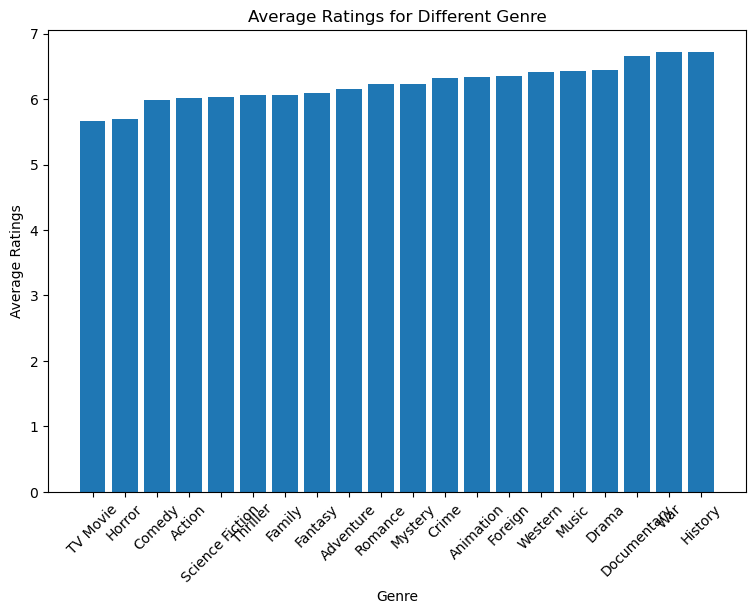

In [48]:
#Removal of rows with zero valued ratings
df_movie_no_0_ratings = df_movie[(df_movie[['vote_average']] != 0).all(axis=1)]
average_ratings = {}

for column in columns_to_plot:
    average_rating = df_movie_no_0_ratings[df_movie_no_0_ratings[column] == 1]['vote_average'].mean()
    average_ratings[column] = average_rating
    
sorted_ratings = dict(sorted(average_ratings.items(), key=lambda item: item[1]))

plt.figure(figsize=(9, 6))
plt.bar(sorted_ratings.keys(), sorted_ratings.values())
plt.xlabel('Genre')
plt.ylabel('Average Ratings')
plt.title('Average Ratings for Different Genre')
plt.xticks(rotation=45)
plt.show()


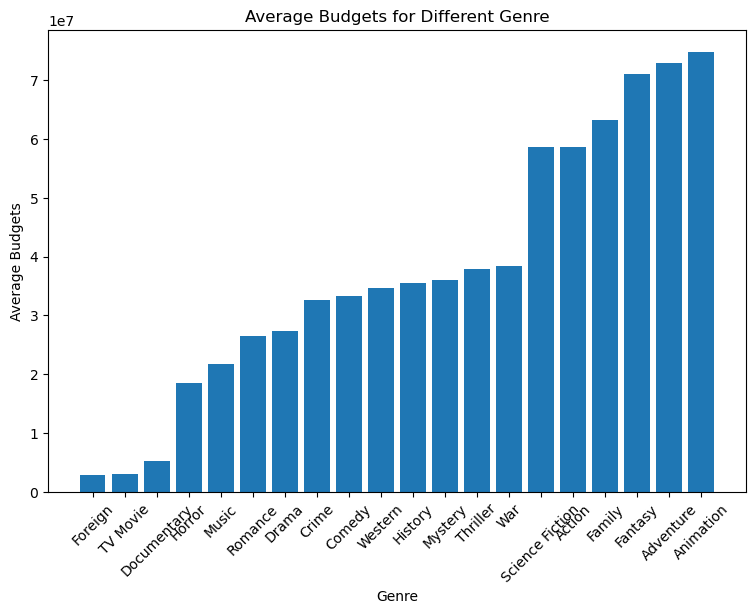

In [73]:
#Removal of rows with zero valued budgets
df_movie_no_0_budgets = df_movie[(df_movie[['budget']] != 0).all(axis=1)]
average_budgets = {}

for column in columns_to_plot:
    average_budget = df_movie_no_0_budgets[df_movie_no_0_budgets[column] == 1]['budget'].mean()
    average_budgets[column] = average_budget
    
sorted_budgets = dict(sorted(average_budgets.items(), key=lambda item: item[1]))

plt.figure(figsize=(9, 6))
plt.bar(sorted_budgets.keys(), sorted_budgets.values())
plt.xlabel('Genre')
plt.ylabel('Average Budgets')
plt.title('Average Budgets for Different Genre')
plt.xticks(rotation=45)
plt.show()


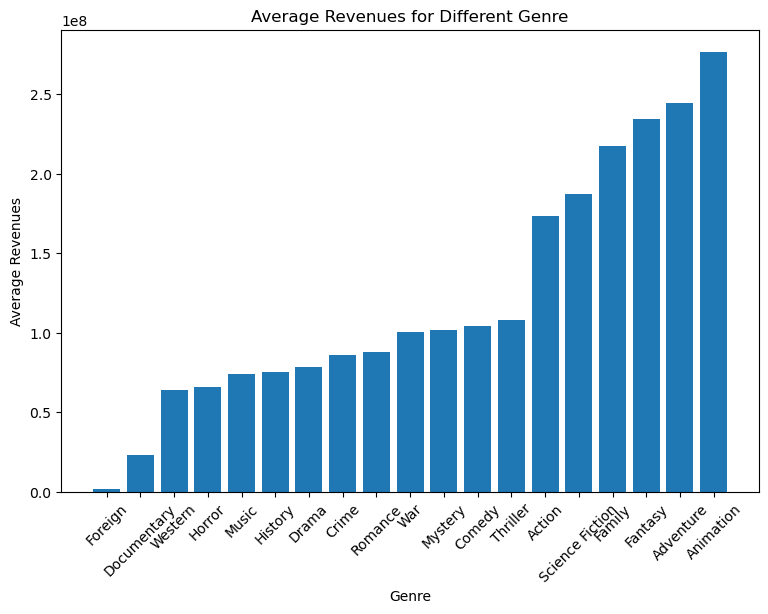

In [69]:
#Removal of rows with zero valued revenue
df_movie_no_0_revenue = df_movie[(df_movie[['revenue']] != 0).all(axis=1)]
average_revenues = {}

for column in columns_to_plot:
    average_revenue = df_movie_no_0_revenue[df_movie_no_0_revenue[column] == 1]['revenue'].mean()
    average_revenues[column] = average_revenue

sorted_revenues = dict(sorted(average_revenues.items(), key=lambda item: item[1]))
sorted_revenues.pop('TV Movie')

plt.figure(figsize=(9, 6))
plt.bar(sorted_revenues.keys(), sorted_revenues.values())
plt.xlabel('Genre')
plt.ylabel('Average Revenues')
plt.title('Average Revenues for Different Genre')
plt.xticks(rotation=45)
plt.show()

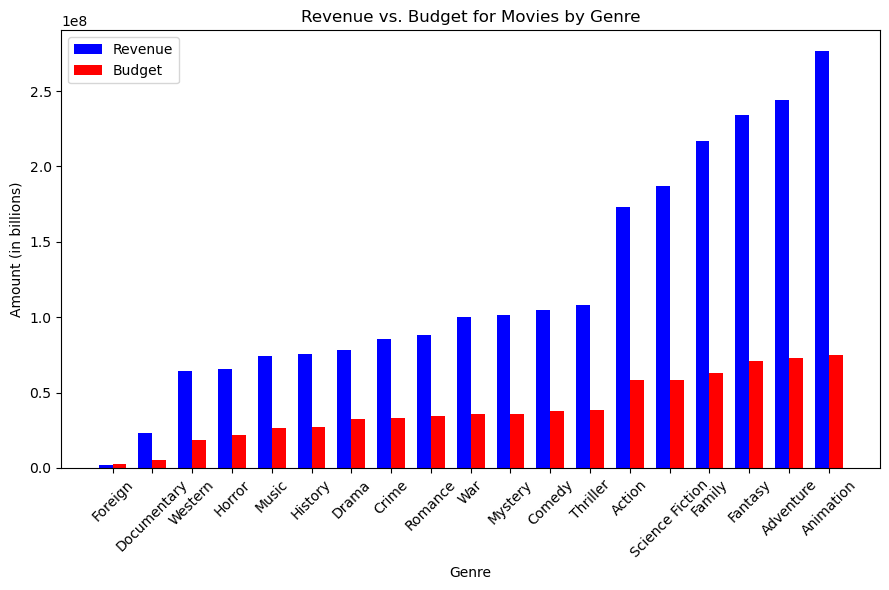

In [75]:
genres = list(sorted_revenues.keys())
sorted_budgets.pop('TV Movie')
index = np.arange(len(genres))

bar_width = 0.35

#grouped bar chart
plt.figure(figsize=(9, 6))
plt.bar(index - bar_width/2, list(sorted_revenues.values()), bar_width, label='Revenue', color='b', align='center')
plt.bar(index + bar_width/2, list(sorted_budgets.values()), bar_width, label='Budget', color='r', align='center')

plt.xlabel('Genre')
plt.ylabel('Amount (in billions)')
plt.title('Revenue vs. Budget for Movies by Genre')
plt.xticks(index, genres, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


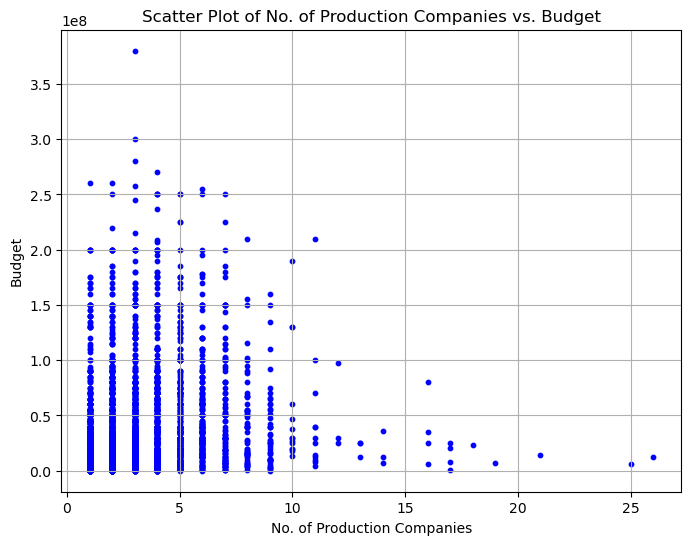

In [80]:
# scatter plot
#Removal of rows with zero valued budget and no production companies
df_for_plot = df_movie[(df_movie[['num_of_production_companies','budget']] != 0).all(axis=1)]
plt.figure(figsize=(8, 6))
plt.scatter(df_for_plot['num_of_production_companies'], df_for_plot['budget'], color='b', alpha=0.99, s = 10)
plt.xlabel('No. of Production Companies')
plt.ylabel('Budget')
plt.title('Scatter Plot of No. of Production Companies vs. Budget')
plt.grid(True)
plt.show()

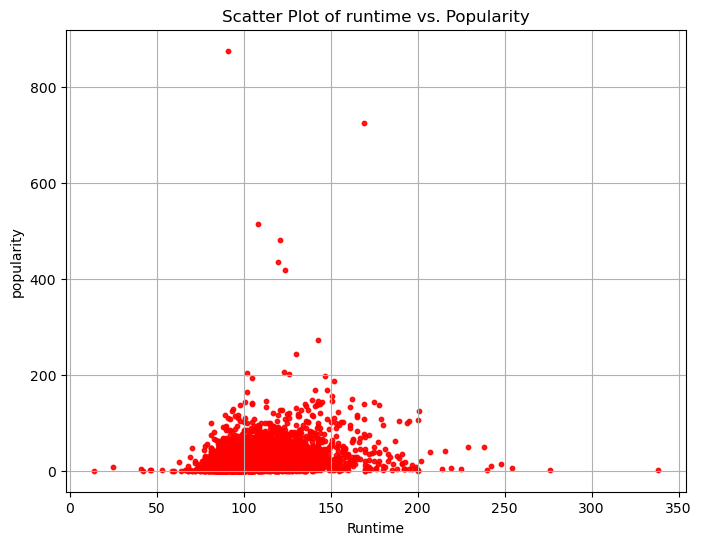

In [81]:
# scatter plot
#Removal of rows with zero valued runtime and popularity
df_for_plot = df_movie[(df_movie[['runtime','popularity']] != 0).all(axis=1)]
plt.figure(figsize=(8, 6))
plt.scatter(df_for_plot['runtime'], df_for_plot['popularity'], color='r', alpha=0.9, s = 10)
plt.xlabel('Runtime')
plt.ylabel('popularity')
plt.title('Scatter Plot of runtime vs. Popularity')
plt.grid(True)
plt.show()

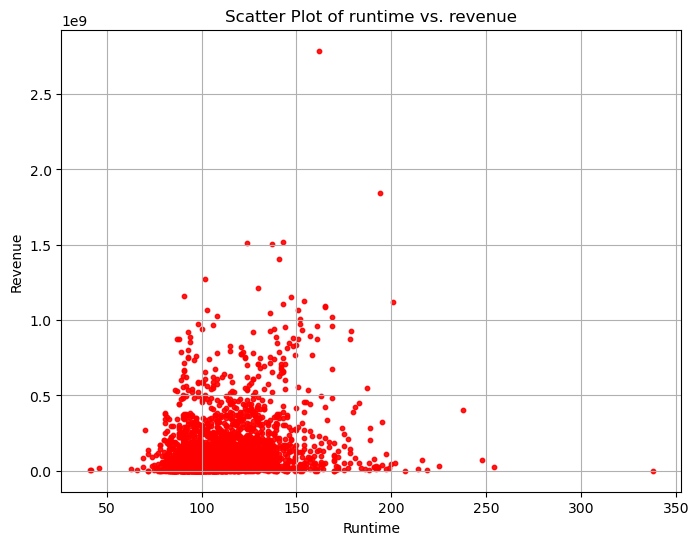

In [82]:
# scatter plot
#Removal of rows with zero valued runtime and revenue
df_for_plot = df_movie[(df_movie[['runtime','revenue']] != 0).all(axis=1)]
plt.figure(figsize=(8, 6))
plt.scatter(df_for_plot['runtime'], df_for_plot['revenue'], color='r', alpha=0.9, s = 10)
plt.xlabel('Runtime')
plt.ylabel('Revenue')
plt.title('Scatter Plot of runtime vs. revenue')
plt.grid(True)
plt.show()

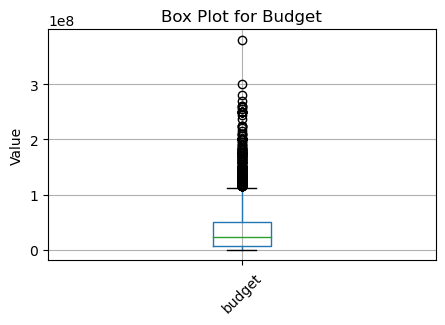

In [85]:
#box plot for 'budget'
#Removal of rows with zero valued budget
df_for_box_plot = df_movie[(df_movie[['budget']] != 0).all(axis=1)]
selected_columns = ['budget']

plt.figure(figsize=(5, 3))
df_for_box_plot[selected_columns].boxplot()
plt.title('Box Plot for Budget')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()


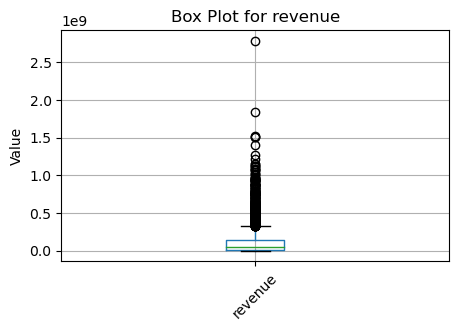

In [86]:
#box plot for 'revenue'
#Removal of rows with zero valued revenue
df_for_box_plot = df_movie[(df_movie[['revenue']] != 0).all(axis=1)]
selected_columns = ['revenue']

plt.figure(figsize=(5, 3))
df_for_box_plot[selected_columns].boxplot()
plt.title('Box Plot for revenue')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

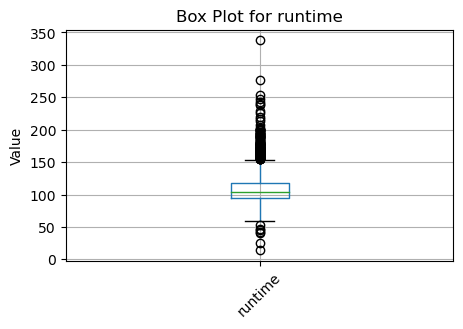

In [88]:
#box plot for 'runtime'
#Removal of rows with zero valued runtime
df_for_box_plot = df_movie[(df_movie[['runtime']] != 0).all(axis=1)]
selected_columns = ['runtime']

plt.figure(figsize=(5, 3))
df_for_box_plot[selected_columns].boxplot()
plt.title('Box Plot for runtime')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

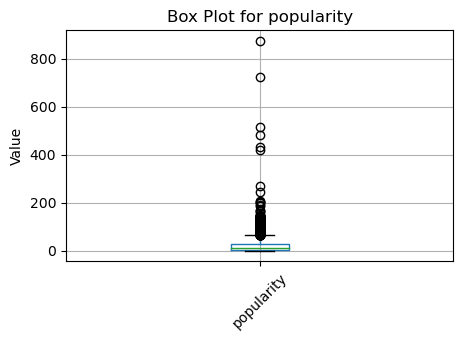

In [89]:
#box plot for 'popularity'
#Removal of rows with zero valued popularity
df_for_box_plot = df_movie[(df_movie[['popularity']] != 0).all(axis=1)]
selected_columns = ['popularity']

plt.figure(figsize=(5, 3))
df_for_box_plot[selected_columns].boxplot()
plt.title('Box Plot for popularity')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

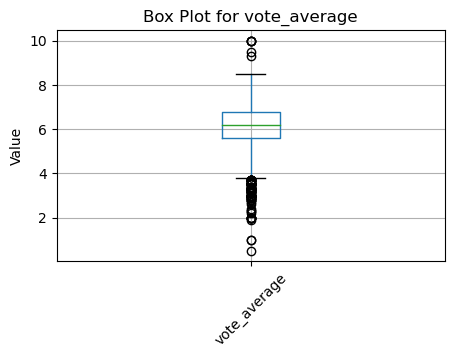

In [90]:
#box plot for 'vote_average'
#Removal of rows with zero valued vote_average
df_for_box_plot = df_movie[(df_movie[['vote_average']] != 0).all(axis=1)]
selected_columns = ['vote_average']

plt.figure(figsize=(5, 3))
df_for_box_plot[selected_columns].boxplot()
plt.title('Box Plot for vote_average')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

<Axes: >

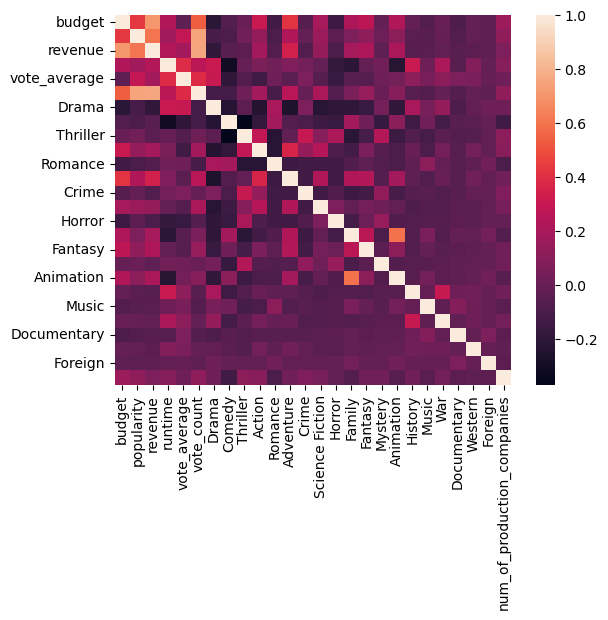

In [91]:
#filtering non zero values only
df_for_heatmap = df_movie[(df_movie[['budget','popularity','revenue', 'runtime','vote_average', 'vote_count']] != 0).all(axis=1)]
df_for_heatmap = df_for_heatmap.loc[:, ['budget','popularity','revenue', 'runtime','vote_average', 'vote_count','Drama','Comedy', 'Thriller', 'Action', 'Romance', 'Adventure', 'Crime','Science Fiction', 'Horror', 'Family', 'Fantasy', 'Mystery','Animation', 'History', 'Music', 'War', 'Documentary', 'Western','Foreign', 'num_of_production_companies']]
sns.heatmap(df_for_heatmap.corr()) 